In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix,classification_report
)
import matplotlib.pyplot as plt
import numpy as np

In [27]:
df = pd.read_csv(r"/content/diabetes.csv")

In [28]:
print(df.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

In [36]:
#split features
features = df.drop("Outcome", axis=1) #includes all features expect last,for better accuracy
outcome = df['Outcome']

In [37]:
#handle missing values
features = features.fillna(features.mean())


In [58]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(features,outcome,test_size=0.2,random_state=42)


In [59]:
#model fit and training
model = LogisticRegression();
model.fit(X_train,y_train);

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
#make predictions
predictions = model.predict(X_test)

In [61]:
#accuracy metrices
acc=accuracy_score(y_test,predictions)
prec=precision_score(y_test,predictions)
rec=recall_score(y_test,predictions)
f1=f1_score(y_test,predictions)
cm = confusion_matrix(y_test, predictions)

print("\n Accuracy : ",acc)
print("Precision : ",prec)
print("Recall : ",rec)
print("F1 Score : ",f1)
print("\n Confusion Matrix : \n",cm)
print("\n Classification Report:\n", classification_report(y_test, predictions))



 Accuracy :  0.7402597402597403
Precision :  0.631578947368421
Recall :  0.6545454545454545
F1 Score :  0.6428571428571429

 Confusion Matrix : 
 [[78 21]
 [19 36]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



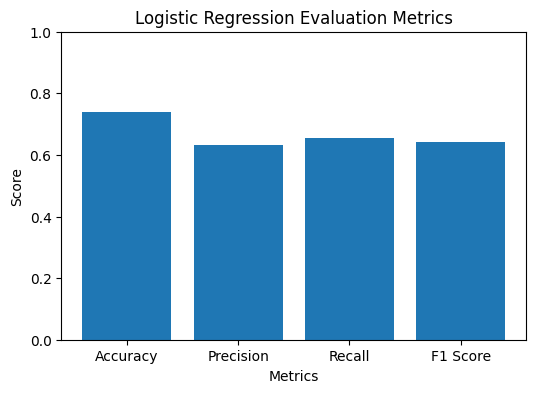

In [63]:
import matplotlib.pyplot as plt

# Metrics and their values
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
values = [acc, prec, rec, f1]

plt.figure(figsize=(6,4))
plt.bar(metrics, values)
plt.ylim(0, 1)  # scale from 0 to 1
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Logistic Regression Evaluation Metrics")
plt.show()
